# Exploratory Data Analysis of Stock Market Data

## Imports

In [1]:
from plotly.offline import plot, iplot, init_notebook_mode
from statsmodels.tsa.seasonal import seasonal_decompose
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
import pandas as pd
import warnings

## Options

In [2]:
pio.renderers.default = "iframe"
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Functions

In [3]:
def split_date(df, target_col, new_alias=None):
    """
    Utility to convert a date column into various date entities like year, month, day, etc.
    
    Args:
        df (pd.DataFrame): Input DataFrame
        target_col (string): Feature on which the split needs to be performed. Must be of datetime type
        new_alias (string): String alias to be used for split columns generated from target_col. 
                            In case no value is passed then it is same as target_col
    """
    
    if new_alias is None:
        new_alias = target_col
    
    df[f'{new_alias}_year'] = df[target_col].dt.year
    df[f'{new_alias}_month'] = df[target_col].dt.month
    df[f'{new_alias}_day'] = df[target_col].dt.day
    df[f'{new_alias}_quarter'] = df[target_col].dt.quarter
    df[f'{new_alias}_is_month_start'] = df[target_col].dt.is_month_start.astype(int)
    df[f'{new_alias}_is_month_end'] = df[target_col].dt.is_month_end.astype(int)
    
    return df

## Load Data

In [4]:
raw_df = pd.read_csv('GMBL.csv', parse_dates=['Date'])

raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-22,15.15,18.00,15.15,16.35,16.35,127
1,2018-01-23,15.00,15.00,14.85,15.00,15.00,113
2,2018-01-24,12.15,14.25,12.15,14.25,14.25,40
3,2018-01-25,12.15,14.25,12.15,14.10,14.10,220
4,2018-01-26,14.10,14.10,11.25,14.10,14.10,520


## Preprocess

### Column Names

In [5]:
df = raw_df.copy()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,date,open,high,low,close,adj_close,volume
0,2018-01-22,15.15,18.00,15.15,16.35,16.35,127
1,2018-01-23,15.00,15.00,14.85,15.00,15.00,113
2,2018-01-24,12.15,14.25,12.15,14.25,14.25,40
3,2018-01-25,12.15,14.25,12.15,14.10,14.10,220
4,2018-01-26,14.10,14.10,11.25,14.10,14.10,520


## Feature Engineering

### Split Dates

In [6]:
df = split_date(df, 'date')

### Returns

In [7]:
df['returns'] = df.adj_close - df.open
df['returns_prc'] = 100 * (df.returns / df.adj_close)

## Exploratory Data Analysis

### Dataframe

So basically this dataset contains 6 different features i.e. date, open, high, low, close, volume
Date - This contains date + time at the instant of trade
Open - Open is the price when the stock began
High - Maximum price at the given time period
Low - Minimum price at the given time period
Close - Price at which stock ended
Volume - It is the total amount of trading activity
Incase of our data the time period is 15 minutes¶


In [8]:
df.head()

,date,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns,returns_prc
0,2018-01-22,15.15,18.00,15.15,16.35,16.35,127,2018,1,22,1,0,0,1.20,7.339450
1,2018-01-23,15.00,15.00,14.85,15.00,15.00,113,2018,1,23,1,0,0,0.00,0.000000
2,2018-01-24,12.15,14.25,12.15,14.25,14.25,40,2018,1,24,1,0,0,2.10,14.736842
3,2018-01-25,12.15,14.25,12.15,14.10,14.10,220,2018,1,25,1,0,0,1.95,13.829787
4,2018-01-26,14.10,14.10,11.25,14.10,14.10,520,2018,1,26,1,0,0,0.00,0.000000


### Shape and Size

In [9]:
print(f'Dataframe Shape: {df.shape}')
print(f'Dataframe Size: {df.size}')

Dataframe Shape: (1259, 15)
Dataframe Size: 18885


### Column datatypes

In [10]:
df.dtypes

date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
adj_close                     float64
volume                          int64
date_year                       int64
date_month                      int64
date_day                        int64
date_quarter                    int64
date_is_month_start             int32
date_is_month_end               int32
returns                       float64
returns_prc                   float64
dtype: object

### Info and Description

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 1259 non-null   datetime64[ns]
 1   open                 1259 non-null   float64       
 2   high                 1259 non-null   float64       
 3   low                  1259 non-null   float64       
 4   close                1259 non-null   float64       
 5   adj_close            1259 non-null   float64       
 6   volume               1259 non-null   int64         
 7   date_year            1259 non-null   int64         
 8   date_month           1259 non-null   int64         
 9   date_day             1259 non-null   int64         
 10  date_quarter         1259 non-null   int64         
 11  date_is_month_start  1259 non-null   int32         
 12  date_is_month_end    1259 non-null   int32         
 13  returns              1259 non-nul

In [12]:
df.describe()

,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns,returns_prc
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,6.710576,7.081736,6.288017,6.705021,6.705021,8.144954e+05,2020.051628,6.544877,15.736299,2.514694,0.031771,0.033360,-0.005555,-0.793656
std,4.316783,4.582962,4.041733,4.309264,4.309264,2.751358e+06,1.430322,3.428838,8.759843,1.115179,0.175460,0.179646,0.721556,9.549017
min,0.072000,0.073000,0.067000,0.071000,0.071000,0.000000e+00,2018.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-4.800000,-83.870968
25%,3.967500,4.190000,3.752500,3.935000,3.935000,6.635000e+02,2019.000000,4.000000,8.000000,2.000000,0.000000,0.000000,-0.192500,-4.481550
50%,6.585000,6.950000,6.150000,6.530000,6.530000,1.909000e+05,2020.000000,7.000000,16.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,9.600000,9.905000,9.150000,9.600000,9.600000,6.037000e+05,2021.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.140000,3.386124
max,20.851000,24.480000,18.650000,19.780001,19.780001,4.446570e+07,2023.000000,12.000000,31.000000,4.000000,1.000000,1.000000,7.320000,56.989247


### Missing Values

In [13]:
df.isnull().sum()

date                   0
open                   0
high                   0
low                    0
close                  0
adj_close              0
volume                 0
date_year              0
date_month             0
date_day               0
date_quarter           0
date_is_month_start    0
date_is_month_end      0
returns                0
returns_prc            0
dtype: int64

### Columns skew

In [14]:
df.skew(numeric_only=True)

open                   0.255851
high                   0.330664
low                    0.226159
close                  0.242325
adj_close              0.242325
volume                 9.855800
date_year              0.015294
date_month            -0.015291
date_day               0.017166
date_quarter          -0.017995
date_is_month_start    5.345642
date_is_month_end      5.203384
returns                0.819659
returns_prc           -1.221346
dtype: float64

### Correaltion

In [15]:
correlations = df.corr()
correlations

,open,high,low,close,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns,returns_prc
open,1.000000,0.988441,0.988632,0.986007,0.986007,-0.224736,-0.612127,-0.182600,-0.001716,-0.195813,0.005913,-0.011850,-0.093987,-0.025953
high,0.988441,1.000000,0.980983,0.992266,0.992266,-0.206615,-0.609126,-0.191223,-0.000408,-0.204990,0.005921,-0.005113,0.012543,0.054164
low,0.988632,0.980983,1.000000,0.988275,0.988275,-0.225797,-0.602042,-0.189288,0.000674,-0.203421,0.002170,-0.010450,-0.012438,0.048230
close,0.986007,0.992266,0.988275,1.000000,1.000000,-0.220212,-0.615271,-0.192736,0.002377,-0.206720,0.010923,-0.005055,0.073292,0.115913
adj_close,0.986007,0.992266,0.988275,1.000000,1.000000,-0.220212,-0.615271,-0.192736,0.002377,-0.206720,0.010923,-0.005055,0.073292,0.115913
volume,-0.224736,-0.206615,-0.225797,-0.220212,-0.220212,1.000000,0.346961,0.008199,0.024190,0.004172,-0.020550,0.015109,0.029359,-0.037763
date_year,-0.612127,-0.609126,-0.602042,-0.615271,-0.615271,0.346961,1.000000,-0.053069,-0.024988,-0.049066,0.009296,-0.009802,-0.012396,-0.033676
date_month,-0.182600,-0.191223,-0.189288,-0.192736,-0.192736,0.008199,-0.053069,1.000000,0.003173,0.971025,0.016126,0.005311,-0.058628,-0.059788
date_day,-0.001716,-0.000408,0.000674,0.002377,0.002377,0.024190,-0.024988,0.003173,1.000000,0.008127,-0.304855,0.311706,0.024461,0.009786
date_quarter,-0.195813,-0.204990,-0.203421,-0.206720,-0.206720,0.004172,-0.049066,0.971025,0.008127,1.000000,0.013862,0.005487,-0.063099,-0.065142


Adj Close(target Variable) shows high positive dependency on open,low,high,close and negative dependancy on Volume as expected. But to our surprise it show dependency on the month and the quater of the year.

In [16]:
fig = px.imshow(
    correlations.round(2), 
    text_auto=True, 
    color_continuous_scale='RdYlBu', 
    title="Feature Correlations"
)

fig.update_xaxes(tickangle=90)
fig.show()

### Data subset for plot

In [17]:
# NOTE: Creating a subset of data to produce uncluttered plots
year_since = 2018
plot_df = df.loc[df.date_year > year_since, :]

### Volume over date

This line plot clearly indicates that there are huge spikes in second half(Octy-Mar) of the financial year for volume traded of this stock over several year.

In [18]:
fig = px.line(x=df.date, y=df.volume)
fig.show()

### Price over volume

This plot clearly shoes the unstability of stock over the year 2021.However it got a bit stable in later years.

In [19]:
fig = px.line(x=plot_df.volume, y=plot_df.adj_close, color=plot_df.date_year)
fig.show()

### Price over time

With this graph we can observethere was a spike during early 2021 and just like a cycle in stock market now it is in bearish phase.

In [20]:
# Make subplots
fig = make_subplots(rows=5, cols=1, subplot_titles=('Open','High','Low','Close', 'Adjusted Close'))

# Add Open, High, Low, CLose, Adjusted Close
fig.add_trace(go.Scatter(x=plot_df.date, y=plot_df.open), row=1, col=1)
fig.add_trace(go.Scatter(x=plot_df.date, y=plot_df.high), row=2, col=1)
fig.add_trace(go.Scatter(x=plot_df.date, y=plot_df.low), row=3, col=1)
fig.add_trace(go.Scatter(x=plot_df.date, y=plot_df.close), row=4, col=1)
fig.add_trace(go.Scatter(x=plot_df.date, y=plot_df.adj_close), row=5, col=1)

# Layout params
fig.update_layout(height=600, width=800, title_text=f'GMBL Stock (since {year_since})')
fig.show()

### Seasonal Trends

As expected, since it's a penny stock there is as such no particular pattern observed which has repeated itself over time.

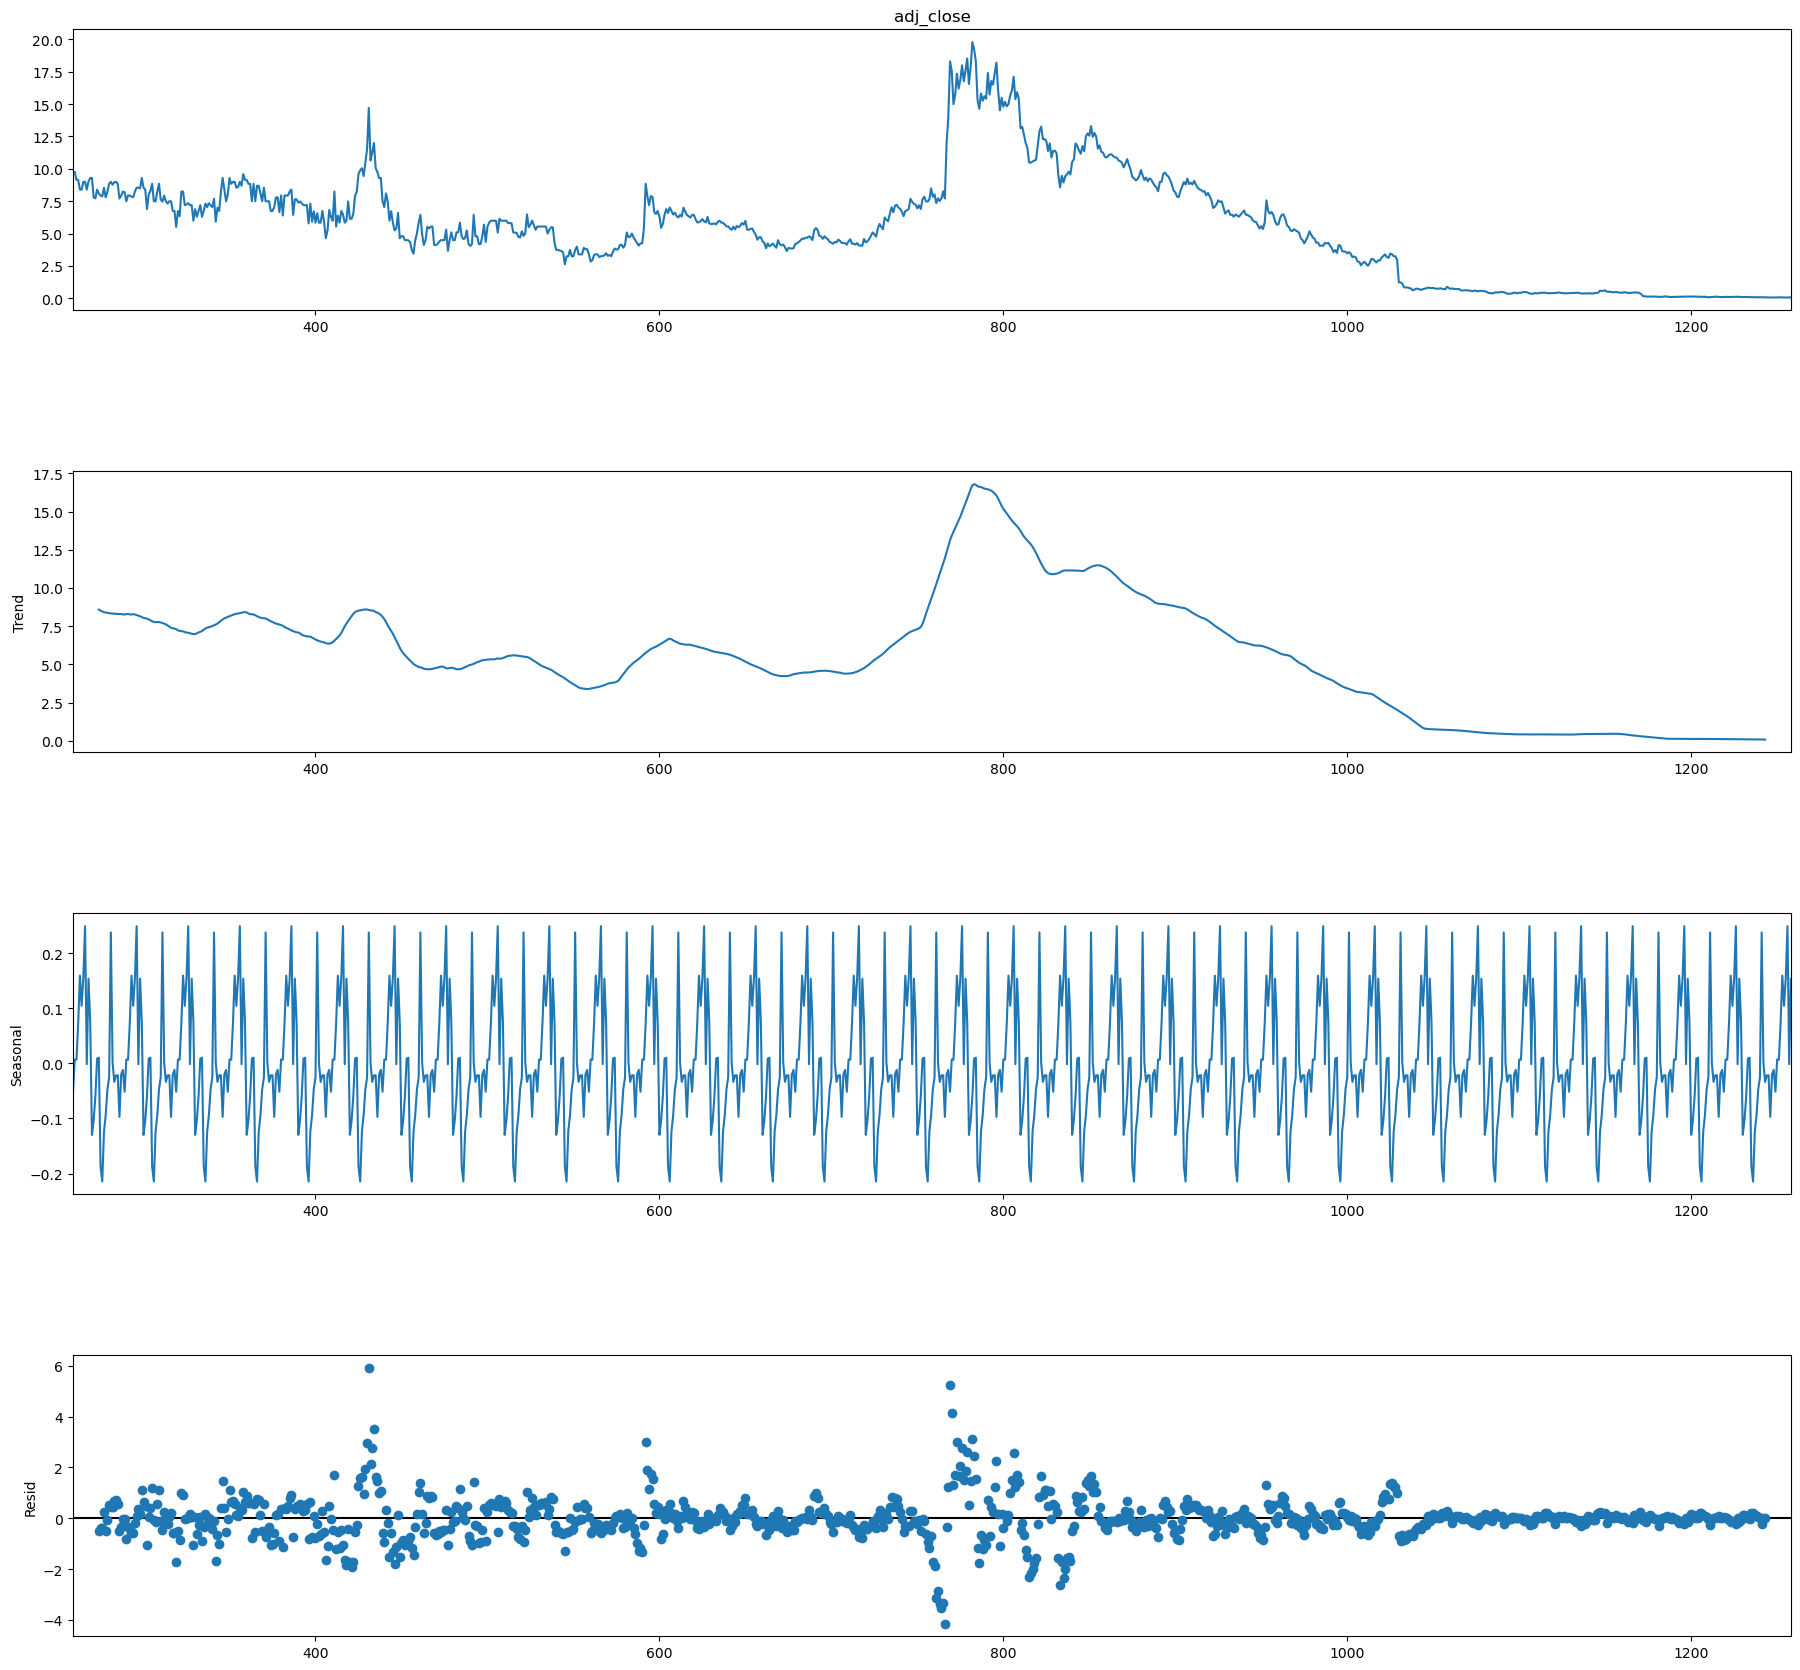

In [21]:
# Last n days visualized
n = 1000
result_data = seasonal_decompose(
    df.adj_close.tail(n),
    model='additive',
    period=30
)

fig = go.Figure()
fig = result_data.plot()
fig.set_size_inches(20, 19)

## Save dataframe

### Drop unwanted columns

In [23]:
df = df.drop(columns=['close'])

### Write file

In [24]:
df.to_csv('../static/datasets/preprocessed_gmbh.csv', index=False)
df.shape

(10610, 14)

In [25]:
df.head()

,date,open,high,low,adj_close,volume,date_year,date_month,date_day,date_quarter,date_is_month_start,date_is_month_end,returns,returns_prc
0,1980-12-12,0.128348,0.128906,0.128348,0.099874,469033600,1980,12,12,4,0,0,-0.028474,-28.509923
1,1980-12-15,0.122210,0.122210,0.121652,0.094663,175884800,1980,12,15,4,0,0,-0.027547,-29.100071
2,1980-12-16,0.113281,0.113281,0.112723,0.087715,105728000,1980,12,16,4,0,0,-0.025566,-29.146668
3,1980-12-17,0.115513,0.116071,0.115513,0.089886,86441600,1980,12,17,4,0,0,-0.025627,-28.510558
4,1980-12-18,0.118862,0.119420,0.118862,0.092492,73449600,1980,12,18,4,0,0,-0.026370,-28.510574
